<a href="https://colab.research.google.com/github/Kazantsev-Alexey/ML_DS/blob/main/%D0%94%D0%97%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ

In [2]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [ ]:
import numpy as np
import pandas as pd

arra = np.arange(1, 101)
arra=arra.reshape((10, 10))
arra=arra[::2]
sliced=[]
for i in arra:
  sliced.append(list(i[::2]))
sliced
array1=np.asarray(sliced)
array1


array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [ ]:
# решение с использованием numpy
# для оценки времени исоплнения блока
%%time
# зададим длину нашей последовательности
dlina_posl = 100_000_000
# ваш код тут
import numpy as np
import time

dlina_posl = 100_000_000
def avg(x):
  """выводит среднее арифметическое
  для заданной последовательности"""
  a_row= np.arange(dlina_posl)
  count= np.mean(a_row)
  print(f'Среднее арифметическое последовательности {count}')
avg(dlina_posl)


Среднее арифметическое последовательности 49999999.5
CPU times: user 315 ms, sys: 340 ms, total: 655 ms
Wall time: 657 ms


In [ ]:
# решение без использования numpy
# для оценки времени исоплнения блока
%%time

# ваш код тут
def avg(x):
  """выводит среднее арифметическое
  для заданной последовательности"""
  row= (i for i in range(dlina_posl))
  count =0
  for i in row:
    count+=i
  count/=dlina_posl
  print(f'Среднее арифметическое последовательности {count}')
avg(dlina_posl)

Среднее арифметическое последовательности 49999999.5
CPU times: user 9.46 s, sys: 12 µs, total: 9.46 s
Wall time: 9.47 s


## Задание 3 *(необязательно)

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [6]:
# задано изначально
r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))
s=s.sort_values()
for i in s.index:
  if s[i]>5:
    print(i)
    break


67


## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

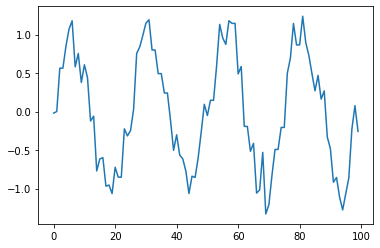

In [3]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут
# по какой-то причине результат сохраняется только через приравнивание
df = df.fillna(method ="ffill")
# отобразим
plt.plot(df.target.values)

## Задание 5 *(необязательно)

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:


* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [18]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# ваш код тут
pd.options.display.max_columns= 6
age=df.loc[df['возраст']>40]
income = df.loc[df['доход']>df.доход.mean()]
inc2= df.loc[df['доход']>df.доход.mean()]
# по какой то причине схема (условие 1) & (условие 2) не сработала
# и появлялась ошибка unsupported operand type(s) for &: 'float' and 'float'
# но если разбить действия на два этапа (inc2 & inc3), то ошибки нет
inc3= inc2.loc[inc2['надежность клиента (0..1)'] < df.iloc[:, 3].mean()]
df['важность'] = df['доход']*df['надежность клиента (0..1)']
df['долгосрочность'] = df['важность']*(df.возраст.mean()-df.возраст)
print('Полный фрейм: \n',df,'\n')
print('Старше сорока: \n',age, '\n')
print('Доход выше среднего: \n',income, '\n')
print('Доход и надежность: \n',inc3)
# я все вывел через print т.к. без него выводится только последний указанный датафрейм

Полный фрейм: 
      имя  возраст   доход  ...  пол  важность  долгосрочность
0   Петя       45  100000  ...  муж   65000.0       -763750.0
1   Вася       26   80000  ...  муж   59200.0        429200.0
2    Аня       41  150000  ...  жен  130500.0      -1011375.0
3  Света       21   60000  ...  жен   40800.0        499800.0

[4 rows x 7 columns] 

Старше сорока: 
     имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен 

Доход выше среднего: 
     имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен 

Доход и надежность: 
     имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
